In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from skimage.io import imread_collection, imshow
from sklearn.model_selection import train_test_split


from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.optimizers import adam

Lets import our data.

Since image shape vary, we will use padd_image function to transform images into the shape (300, 300, 3).

We will exclude grayscale images from the dataset.

In [68]:
i = -1
def padd_image(img):
        global i
        i += 1
        old_image_height, old_image_width, channels = img.shape

        # create new image of desired size and color (blue) for padding
        new_image_width = 300
        new_image_height = 300
        color = (0,0,0)
        result = np.full((new_image_height,new_image_width, channels), color, dtype=np.uint8)

        # compute center offset
        x_center = (new_image_width - old_image_width) // 2
        y_center = (new_image_height - old_image_height) // 2

        # copy img image into center of result image
        result[y_center:y_center+old_image_height, 
               x_center:x_center+old_image_width] = img
        
        return result
    
n_imgs = 545
n_labels = 9
input_shape = (300, 300, 3)
X = np.zeros((n_imgs, 300, 300, 3), dtype=np.int32)
Y = np.zeros(n_imgs)

# the data, split between train and test sets
beaver = imread_collection('/Users/andrei/Desktop/KNUProjects/Masters/Neironki/master_labs/101_ObjectCategories/beaver/*.jpg')
print('beaver')
for images in beaver:
    if len(images.shape) == 3:
        res = padd_image(images)
        X[i] = res
        Y[i] = 0
        #Y[i] = [1, 0, 0, 0, 0, 0, 0, 0, 0]

cellphone = imread_collection('/Users/andrei/Desktop/KNUProjects/Masters/Neironki/master_labs/101_ObjectCategories/cellphone/*.jpg')
print('cellphone')
for images in cellphone:
    if len(images.shape) == 3:
        res = padd_image(images)
        X[i] = res
        Y[i] = 1
        #Y[i] = [0, 1, 0, 0, 0, 0, 0, 0, 0]

dollar_bill = imread_collection('/Users/andrei/Desktop/KNUProjects/Masters/Neironki/master_labs/101_ObjectCategories/dollar_bill/*.jpg')
print('dollar_bill')
for images in dollar_bill:
    if len(images.shape) == 3:
        res = padd_image(images)
        X[i] = res
        Y[i] = 2
        #Y[i] = [0, 1, 0, 0, 0, 0, 0, 0, 0]

garfield = imread_collection('/Users/andrei/Desktop/KNUProjects/Masters/Neironki/master_labs/101_ObjectCategories/garfield/*.jpg')
print('garfield')
for images in garfield:
    if len(images.shape) == 3:
        res = padd_image(images)
        res = padd_image(images)
        X[i] = res
        Y[i] = 3
        #Y[i] = [0, 1, 0, 0, 0, 0, 0, 0, 0]

kangaroo = imread_collection('/Users/andrei/Desktop/KNUProjects/Masters/Neironki/master_labs/101_ObjectCategories/kangaroo/*.jpg')
print('kangaroo')
for images in kangaroo:
    if len(images.shape) == 3:
        res = padd_image(images)
        X[i] = res
        Y[i] = 4
        #Y[i] = [0, 1, 0, 0, 0, 0, 0, 0, 0]

minaret = imread_collection('/Users/andrei/Desktop/KNUProjects/Masters/Neironki/master_labs/101_ObjectCategories/minaret/*.jpg')
print('minaret')
for images in minaret:
    if len(images.shape) == 3:
        res = padd_image(images)
        X[i] = res
        Y[i] = 5
        #Y[i] = [0, 1, 0, 0, 0, 0, 0, 0, 0]
    
rhino = imread_collection('/Users/andrei/Desktop/KNUProjects/Masters/Neironki/master_labs/101_ObjectCategories/rhino/*.jpg')
print('rhino')
for images in rhino:
    if len(images.shape) == 3:
        res = padd_image(images)
        X[i] = res
        Y[i] = 6
        #Y[i] = [0, 1, 0, 0, 0, 0, 0, 0, 0]

stegosaurus = imread_collection('/Users/andrei/Desktop/KNUProjects/Masters/Neironki/master_labs/101_ObjectCategories/stegosaurus/*.jpg')
print('stegosaurus')
for images in stegosaurus:
    if len(images.shape) == 3:
        res = padd_image(images)
        X[i] = res
        Y[i] = 7
        #Y[i] = [0, 1, 0, 0, 0, 0, 0, 0, 0]

windsor_chair = imread_collection('/Users/andrei/Desktop/KNUProjects/Masters/Neironki/master_labs/101_ObjectCategories/windsor_chair/*.jpg')
print('windsor_chair')
for images in windsor_chair:
    if len(images.shape) == 3:
        res = padd_image(images)
        X[i] = res
        Y[i] = 8
        #Y[i] = [0, 1, 0, 0, 0, 0, 0, 0, 0]

beaver
cellphone
dollar_bill
garfield
kangaroo
minaret
rhino
stegosaurus
windsor_chair


We obtained dataset X and set of coresponding labels Y.

Labels corespond to the following indexes:
0 - beaver,
1 - cellphone,
2 - dollar_bill,
3 - garfield,
4 - kangaroo,
5 - minaret,
6 - rhino,
7 - stegosaurus,
8 - windsor_chair.

Lets show an example of the (X, Y) pair.

/Users/andrei/anaconda3/envs/nlp_course/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


1.0

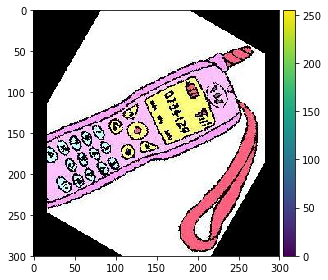

In [69]:
imshow(X[54])
Y[54]

Lets normalize pixel values to the range (0, 1).

Lets transform numerical values of 0, 1, 2, 3 .. 8 into the arrays of label probabilities. Label 0 will be [1, 0, 0, 0 .., 0] etc.

Lets split our data to the train and test sets.

In [70]:
X = X/255.
Y = pd.get_dummies(Y)
Y_cols = list(Y.columns)
Y = Y.values

#split between train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y)

Lets define, train and test dense model.

In [71]:
def dense(input_shape, n_labels):
    model = Sequential()
    model.add(Flatten(input_shape=(300, 300, 3)))
    model.add(Dense(32, kernel_initializer="normal", activation="relu"))
    model.add(Dense(64, kernel_initializer="normal", activation="relu"))
    model.add(Dense(128, kernel_initializer="normal", activation="relu"))
    model.add(Dense(64, kernel_initializer="normal", activation="relu"))
    model.add(Dense(n_labels, kernel_initializer="normal", activation="softmax"))
    model.compile(optimizer=adam(lr = 0.001, decay=1e-6),
        loss="categorical_crossentropy", metrics=["accuracy"])
    model.summary()
    return model

In [72]:
model_d = dense(input_shape, n_labels)
batch_size = 64
epochs = 50

model_d.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 270000)            0         
_________________________________________________________________
dense_83 (Dense)             (None, 32)                8640032   
_________________________________________________________________
dense_84 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_85 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_86 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_87 (Dense)             (None, 9)                 585       
Total params: 8,659,305
Trainable params: 8,659,305
Non-trainable params: 0
___________________________________________

Epoch 50/50
326/326 [==============================] - 1s 3ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 1.2029 - val_accuracy: 0.7439


Model with 8,659,305 parametrs and dense layers showed 70% test accuracy

In [73]:
score = model_d.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.7012835040579748
Test accuracy: 0.7007299065589905


Lets define, train and test convolutional model.

In [84]:
def cnn(input_shape, n_labels):
    model = Sequential()
    model.add(InputLayer(input_shape))
    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(n_labels, activation="softmax"))
    model.compile(optimizer=adam(lr = 0.001, decay=1e-6),
        loss="categorical_crossentropy", metrics=["accuracy"])
    model.summary()
    return model

In [85]:
model = cnn(input_shape, n_labels)
batch_size = 128
epochs = 15

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 341056)            0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 341056)            0         
_________________________________________________________________
dense_92 (Dense)             (None, 9)               

Model with 3,108,2335 parametrs and convolutional layers showed 74% test accuracy

In [86]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.9328046523741562
Test accuracy: 0.7372262477874756


Conclusion:

Considering the dataset we used, our simple models shown good results.  545 images is not enough to train a network that will be able to perfectly classify 9 different objects. Moreover, some of the images from the "cellphone" and "minaret" were rotated, which reflects on the models accuracy as well.  

Still, from the results it is obvious, that convolutional networks are better for the image clasification tasks then dense networks.